In [ ]:
from zipfile import ZipFile

file_name = "archive.zip"

with ZipFile(file_name, 'r') as zip:
  for info in zip.infolist():
    print(f"Filename: {info.filename}, Size: {info.file_size} bytes")


Streaming output truncated to the last 5000 lines.
Filename: train/sad/Training_65242339.jpg, Size: 1658 bytes
Filename: train/sad/Training_65267116.jpg, Size: 1566 bytes
Filename: train/sad/Training_65275626.jpg, Size: 1706 bytes
Filename: train/sad/Training_6529266.jpg, Size: 1571 bytes
Filename: train/sad/Training_65329617.jpg, Size: 1499 bytes
Filename: train/sad/Training_65338712.jpg, Size: 1654 bytes
Filename: train/sad/Training_65338797.jpg, Size: 1650 bytes
Filename: train/sad/Training_65387162.jpg, Size: 1675 bytes
Filename: train/sad/Training_65404494.jpg, Size: 1644 bytes
Filename: train/sad/Training_65426218.jpg, Size: 1642 bytes
Filename: train/sad/Training_65430136.jpg, Size: 1574 bytes
Filename: train/sad/Training_65437377.jpg, Size: 1671 bytes
Filename: train/sad/Training_6545735.jpg, Size: 1321 bytes
Filename: train/sad/Training_65463385.jpg, Size: 1553 bytes
Filename: train/sad/Training_65473985.jpg, Size: 1506 bytes
Filename: train/sad/Training_65502829.jpg, Size: 15

In [ ]:
from zipfile import ZipFile
file_name= "archive.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = 'train'
val_dir = 'test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

In [ ]:
emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001),metrics=['accuracy'])
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

Epoch 1/50


<ipython-input-20-fd0d6c77d4d0>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = emotion_model.fit_generator(


448/448 [==============================] - 21s 37ms/step - loss: 1.7435 - accuracy: 0.2890 - val_loss: 1.5619 - val_accuracy: 0.3825
Epoch 2/50
448/448 [==============================] - 19s 41ms/step - loss: 1.4883 - accuracy: 0.4208 - val_loss: 1.3349 - val_accuracy: 0.4897
Epoch 3/50
448/448 [==============================] - 16s 35ms/step - loss: 1.3325 - accuracy: 0.4868 - val_loss: 1.2464 - val_accuracy: 0.5204
Epoch 4/50
448/448 [==============================] - 18s 41ms/step - loss: 1.2384 - accuracy: 0.5259 - val_loss: 1.1887 - val_accuracy: 0.5432
Epoch 5/50
448/448 [==============================] - 16s 35ms/step - loss: 1.1783 - accuracy: 0.5517 - val_loss: 1.1466 - val_accuracy: 0.5640
Epoch 6/50
448/448 [==============================] - 15s 34ms/step - loss: 1.1330 - accuracy: 0.5706 - val_loss: 1.1213 - val_accuracy: 0.5695
Epoch 7/50
448/448 [==============================] - 16s 35ms/step - loss: 1.0916 - accuracy: 0.5874 - val_loss: 1.1186 - val_accuracy: 0.5686
Epo

In [ ]:
emotion_model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model
emotion_model = load_model('model.h5')

In [ ]:

def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))

    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')

    plt.show()


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename


In [ ]:

take_photo()

<IPython.core.display.Javascript object>

OpenCV(4.8.0) /io/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'

1/1 [==============================] - 0s 39ms/step


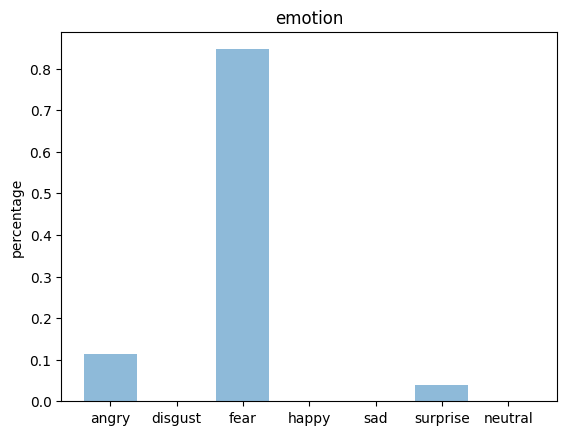

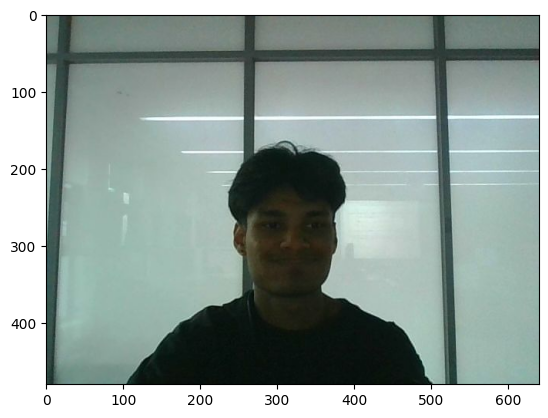

In [ ]:
import cv2

def facecrop(image):
    facedata = '/content/haarcascade_frontalface_alt.xml'
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    try:

        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]


            cv2.imwrite('capture.jpg', sub_face)
            #print ("Writing: " + image)

    except Exception as e:
        print (e)




if __name__ == '__main__':
    facecrop('/content/photo.jpg')

#Testing a file.

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = 'photo.jpg'
true_image = image.load_img(file)
img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = emotion_model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);


plt.imshow(true_image)
plt.show()